<a href="https://colab.research.google.com/github/yeho/scikit-learn-AI/blob/master/planificacion_RTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis de planificación en sistemas de tiempo real**
<br>Autor: Yeho

Utilización total: 0.75
Límite Liu & Layland (n=3): 0.780
Planificable bajo RMS

--- Worst-Case Response Time (WCRT) ---
WCRT T1: 1.0 ms (Deadline 4.0 ms)
WCRT T2: 2.5 ms (Deadline 5.0 ms)
WCRT T3: 7.0 ms (Deadline 10.0 ms)

--- Planificabilidad bajo EDF ---
Planificable bajo EDF


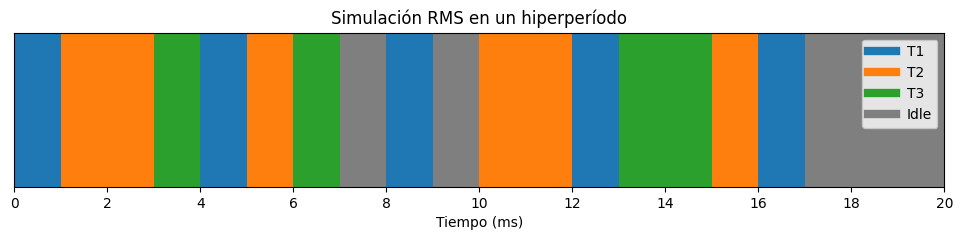

In [12]:
import math
import matplotlib.pyplot as plt

# Definición de tareas
tasks = [
    {"name": "T1", "C": 1.0, "T": 4.0},
    {"name": "T2", "C": 1.5, "T": 5.0},
    {"name": "T3", "C": 2.0, "T": 10.0},
]

# a) Utilización total
U = sum(t["C"] / t["T"] for t in tasks)
print(f"Utilización total: {U:.2f}")

# b) Límite de Liu & Layland
n = len(tasks)
U_ll = n * (2 ** (1/n) - 1)
print(f"Límite Liu & Layland (n={n}): {U_ll:.3f}")
print("Planificable bajo RMS" if U <= U_ll else "No planificable bajo RMS")

# c) Cálculo de WCRT
def wcrt(task, higher_tasks):
    R = task["C"]
    while True:
        interference = sum(math.ceil(R / ht["T"]) * ht["C"] for ht in higher_tasks)
        R_next = task["C"] + interference
        if R_next == R:
            return R
        if R_next > task["T"]:
            return math.inf # Indica que no es planificable
        R = R_next

print("\n--- Worst-Case Response Time (WCRT) ---")
for i, t in enumerate(tasks):
    R = wcrt(t, tasks[:i])
    if R == math.inf:
        print(f"WCRT {t['name']}: No planificable (Deadline {t['T']} ms)")
    else:
        print(f"WCRT {t['name']}: {R:.1f} ms (Deadline {t['T']} ms)")

# d) EDF
print("\n--- Planificabilidad bajo EDF ---")
print("Planificable bajo EDF" if U <= 1 else "No planificable bajo EDF")

# Simulación RMS
def lcm(a, b):
    return abs(a*b) // math.gcd(int(a), int(b))

H = int(lcm(lcm(int(tasks[0]["T"]), int(tasks[1]["T"])), int(tasks[2]["T"])))

priorities = sorted(tasks, key=lambda x: x["T"])  # RMS: menor periodo = mayor prioridad

def simulate_rms(tasks):
    timeline = []
    ready = []
    releases = {t["name"]: 0 for t in tasks}
    remaining = {t["name"]: 0 for t in tasks}

    for time in range(H):
        # Liberar nuevas instancias
        for t in tasks:
            if time % t["T"] == 0:
                remaining[t["name"]] += t["C"]

        # Selección de tarea lista más prioritaria
        running = "Idle"
        for t in priorities:
            if remaining[t["name"]] > 0:
                running = t["name"]
                remaining[t["name"]] -= 1
                break

        timeline.append(running)

    return timeline

# Gráfica tipo Gantt
def plot_rms_timeline(tasks):
    timeline = simulate_rms(tasks)
    H = len(timeline)

    fig, ax = plt.subplots(figsize=(12, 2))
    colors = {"T1": "tab:blue", "T2": "tab:orange", "T3": "tab:green", "Idle": "tab:gray"}

    for t, task in enumerate(timeline):
        ax.broken_barh([(t, 1)], (0, 1), facecolors=colors[task])

    ax.set_xlim(0, H)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Tiempo (ms)")
    ax.set_yticks([])
    ax.set_xticks(range(0, H+1, 2))
    ax.set_title("Simulación RMS en un hiperperíodo")

    legend_patches = [plt.Line2D([0], [0], color=col, lw=6, label=tsk) for tsk, col in colors.items()]
    ax.legend(handles=legend_patches, loc="upper right")

    plt.show()

plot_rms_timeline(tasks)